### Exploratory Data Analysis 

* dataset: 

    https://archive.ics.uci.edu/ml/datasets/Heart+Disease

    https://www.kaggle.com/ronitf/heart-disease-uci/code

* data description:

    1. age 
    2. sex 
    3. chest pain type (4 values) 
    4. resting blood pressure 
    5. serum cholestoral in mg/dl 
    6. fasting blood sugar > 120 mg/dl
    7. resting electrocardiographic results (values 0,1,2)
    8. maximum heart rate achieved 
    9. exercise induced angina 
    10. oldpeak = ST depression induced by exercise relative to rest 
    11. the slope of the peak exercise ST segment 
    12. number of major vessels (0-3) colored by flourosopy 
    13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!gdown --id '16dB6qcS5QBjaOdgdxaxQQg70Xz8vdipj'

Downloading...
From: https://drive.google.com/uc?id=16dB6qcS5QBjaOdgdxaxQQg70Xz8vdipj
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 21.4MB/s]


In [3]:
DATA_PATH = "./heart.csv"
#DATA_PATH = '../ronwise/ml_project/data/raw/heart.csv'

In [4]:
df = pd.read_csv(DATA_PATH)

### Basic data analysis

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', ]
categorical_features = ['sex',  'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', ]
target = ['target', ]

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# classes balance
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Data histograms

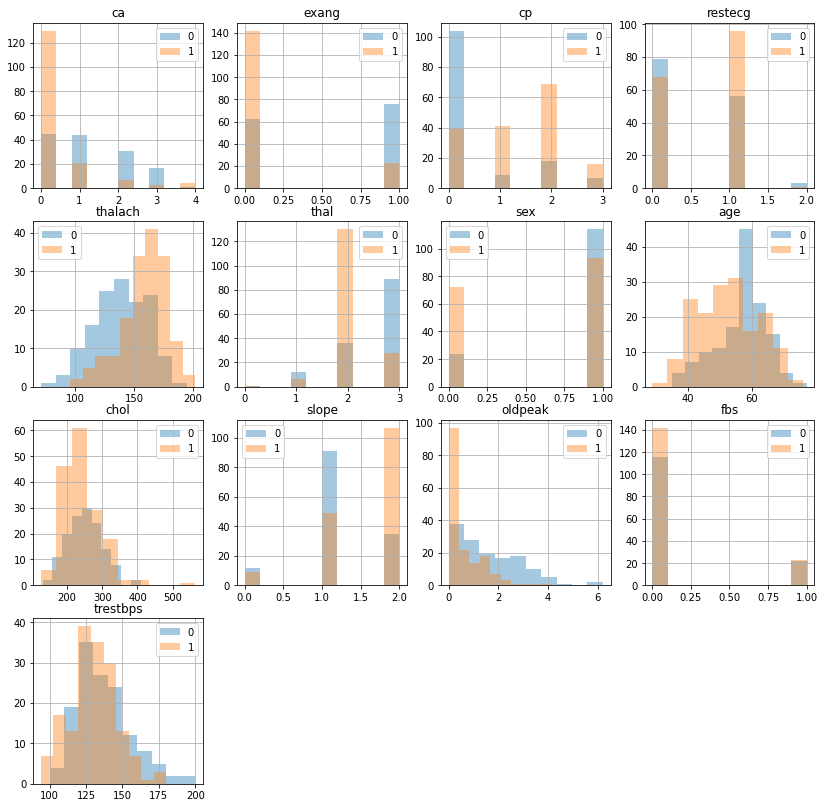

In [ ]:
df_grouped = df.groupby('target')
cols = set(df.columns) - {'target'}

fig = plt.figure(figsize=(14, 14))
for ax_idx, col_name in enumerate(cols):
    ax = fig.add_subplot(4, 4, ax_idx + 1)
    df_grouped[col_name].hist(alpha=0.4, legend=True, ax=ax)
    ax.set_title(col_name)
  
plt.show()

### Scatter matrix

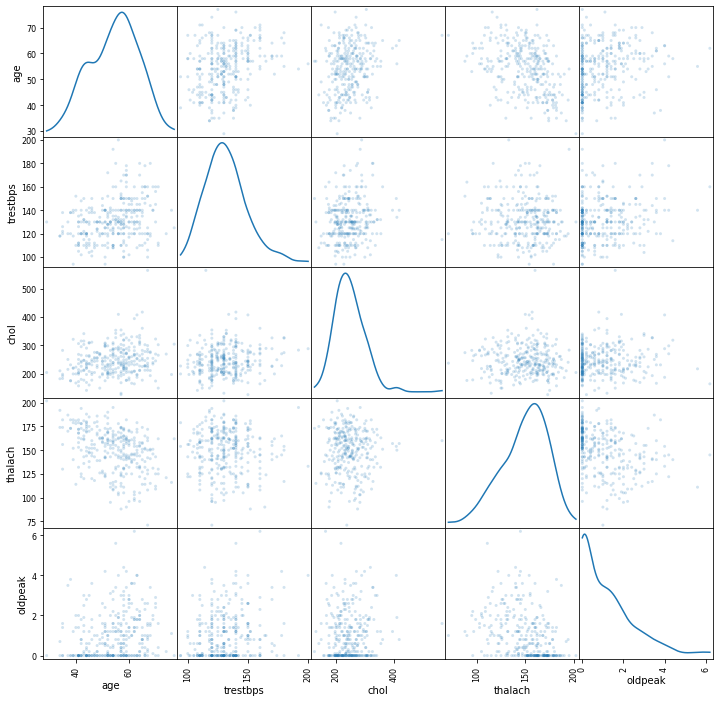

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[numerical_features], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

### Pairplot

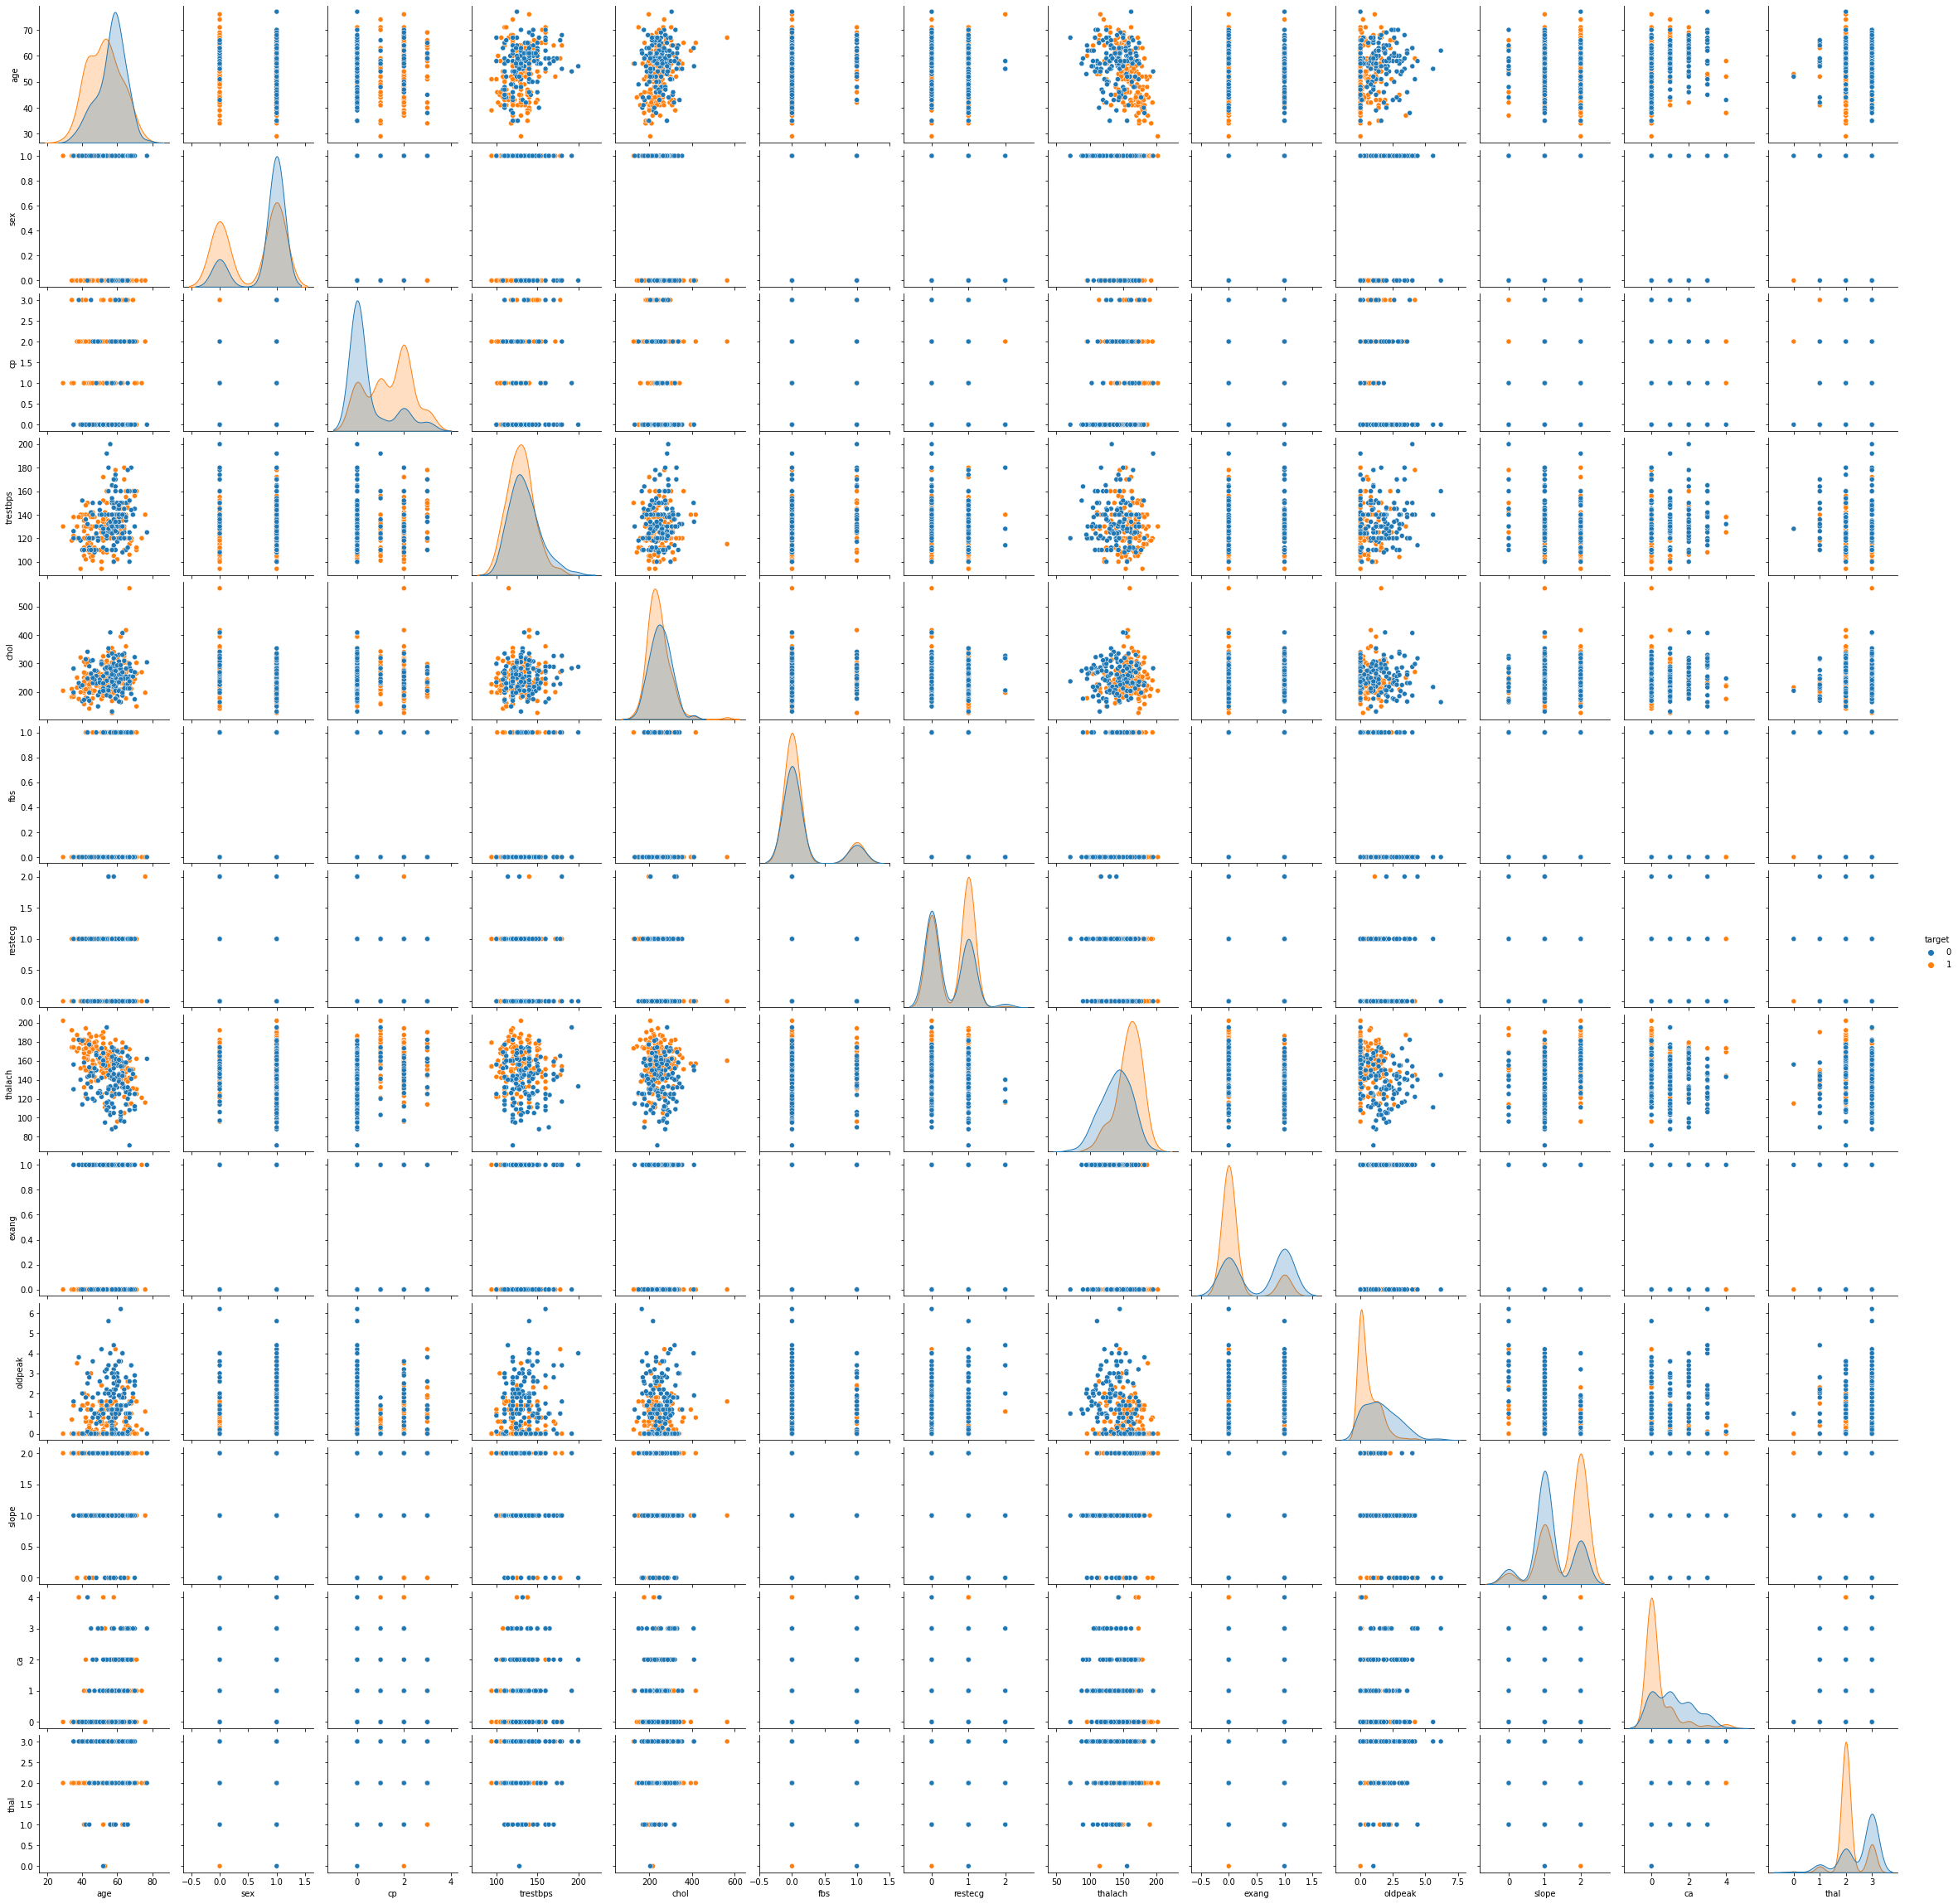

In [ ]:
sns.pairplot(df, hue="target")

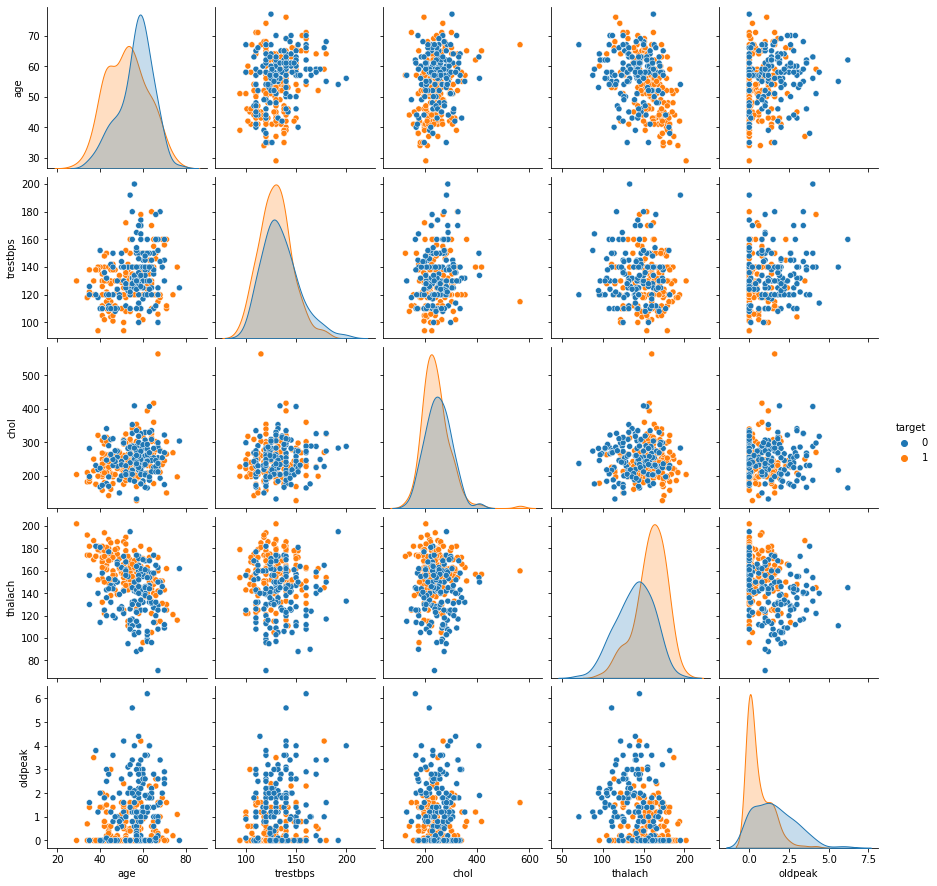

In [ ]:
sns.pairplot(df[numerical_features + ['target', ]], hue="target")

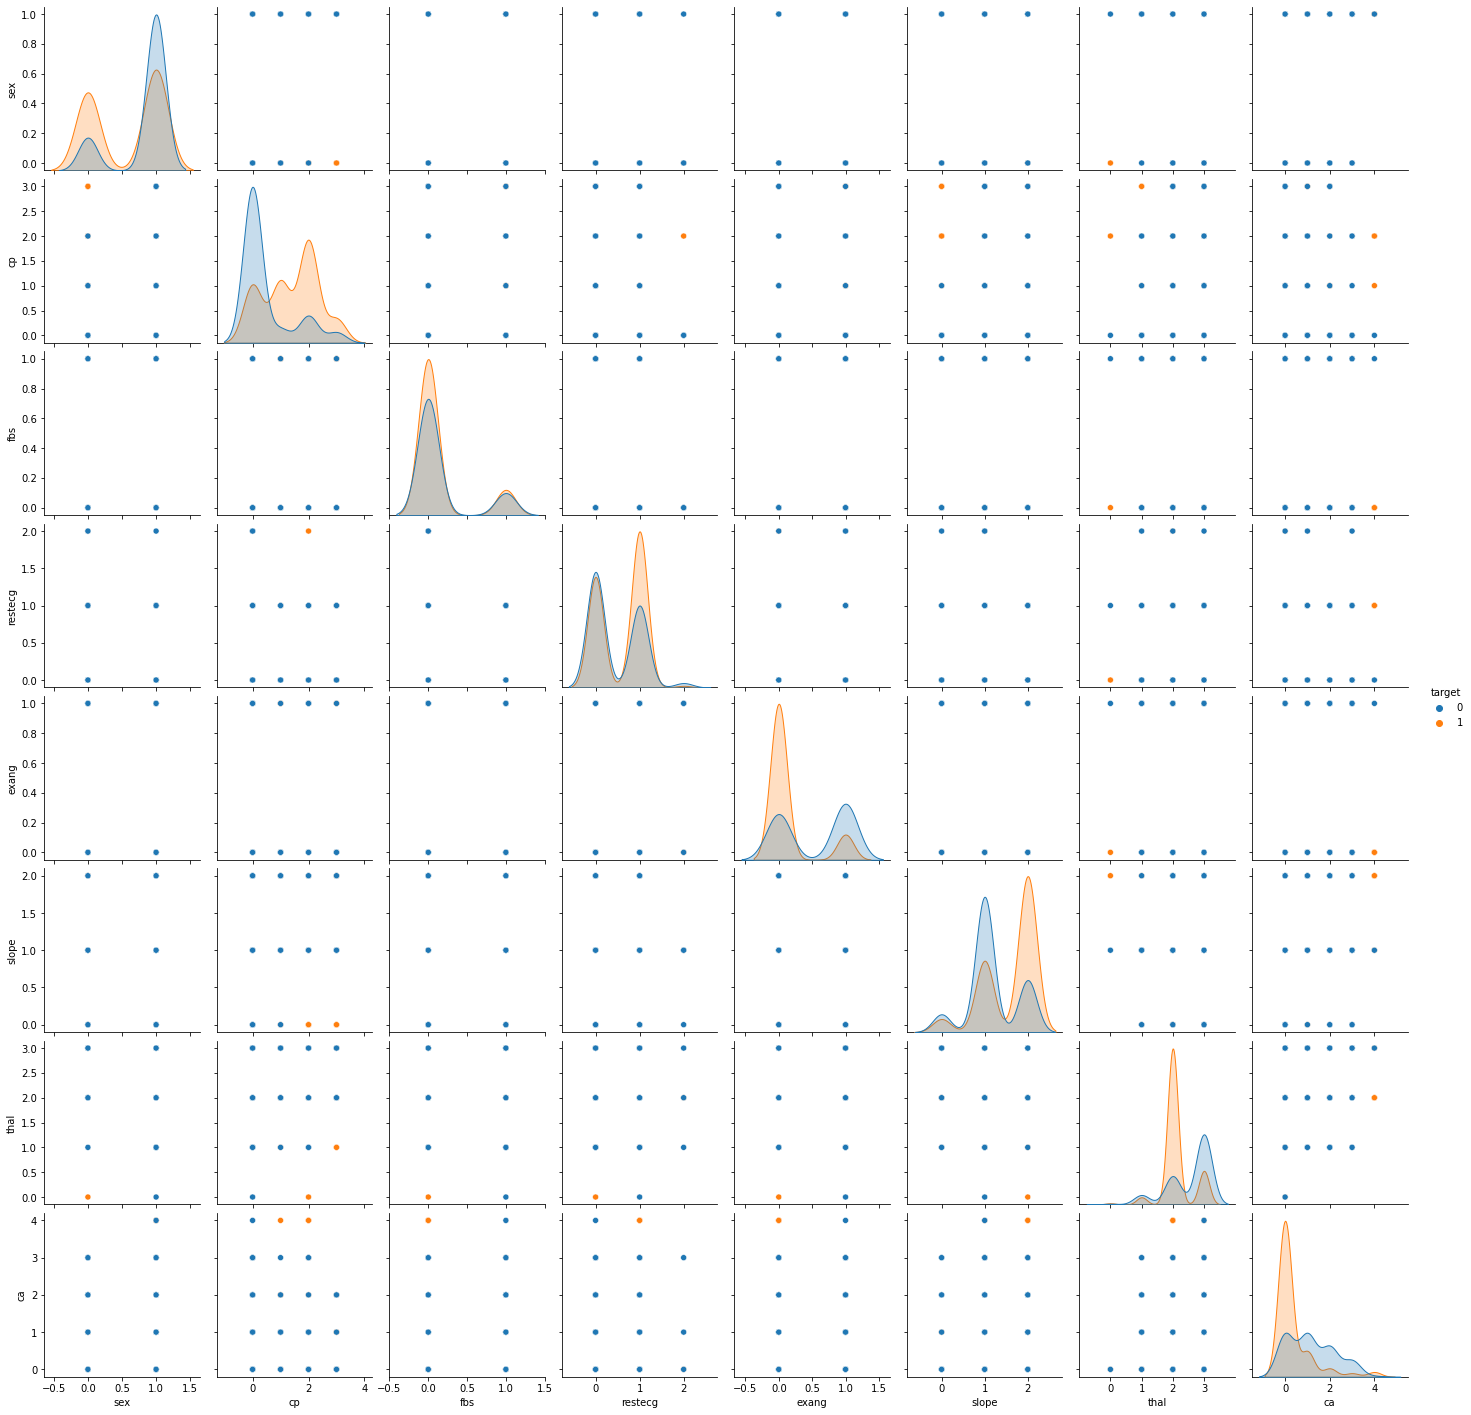

In [ ]:
sns.pairplot(df[categorical_features + ['target', ]], hue="target")

### Models

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import plot_confusion_matrix

In [49]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', ]
categorical_features = ['sex',  'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', ]
target = ['target']

In [7]:
df_data = df.drop(target, axis=1)
df_target = df[target]

X_train, X_test, y_train, y_test = train_test_split(df, df_target.values, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# OHE for categorical variables
ohe = OneHotEncoder(sparse=False, drop='first').fit(X_train[categorical_features].values)

# scaler
scaler = MinMaxScaler().fit(X_train[numerical_features].values)

# create datasets
X_train = np.hstack((scaler.transform(X_train[numerical_features].values), ohe.transform(X_train[categorical_features].values)))
X_test = np.hstack((scaler.transform(X_test[numerical_features].values), ohe.transform(X_test[categorical_features].values)))

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [9]:
# LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(Cs=[0.01, 0.1, 1, 5, 10], cv=5, random_state=42, solver="liblinear", scoring="accuracy").fit(X_train, y_train)
best_parameters = [clf.C_, clf.l1_ratio_]
best_score = clf.score(X_test, y_test)

print(f"Best parameters: C = {best_parameters[0][0]}, l1_ratio = {best_parameters[1][0]}")
print(f"Best score (accuracy) = {best_score:0.4f}")

Best parameters: C = 1.0, l1_ratio = None
Best score (accuracy) = 0.8462


In [19]:
# Random Forest classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


n_estimators = [100, 250, 500, 1000]
criterion = ['gini', 'entropy']

parameters = {'n_estimators': n_estimators,
              'criterion': criterion,
              'random_state': [42, ]}

clf = RandomForestClassifier()

cv = GridSearchCV(clf, parameters, scoring='accuracy', cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

clf = RandomForestClassifier(criterion=cv.best_params_['criterion'], 
                             n_estimators=cv.best_params_['n_estimators'], 
                             random_state=cv.best_params_['random_state']).fit(X_train, y_train)

print(f"Best parameters: criterion = {cv.best_params_['criterion']}, n_estimators = {cv.best_params_['n_estimators']}")
print(f"Best score (accuracy) = {clf.score(X_test, y_test):0.4f}")

Best parameters: criterion = gini, n_estimators = 1000
Best score (accuracy) = 0.8352


In [20]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = list(range(2, 20))
parameters = {'n_neighbors': neighbors}
clf = KNeighborsClassifier()

cv = GridSearchCV(clf, parameters, scoring='accuracy', cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

clf = KNeighborsClassifier(n_neighbors=cv.best_params_['n_neighbors']).fit(X_train, y_train)

print(f"Best parameters: n_neighbors = {cv.best_params_['n_neighbors']}")
print(f"Best score (accuracy) = {clf.score(X_test, y_test):0.4f}")

Best parameters: criten_neighborsrion = 10
Best score (accuracy) = 0.8462
